<a href="https://colab.research.google.com/github/aditijoshi613/ML-Basic-Concepts/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 5.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Random_Exploration/housing_data/House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
print('Number of records: ', df.shape[0])

Number of records:  4746


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Rent', axis = 1)
y = df['Rent']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((3179, 11), (1567, 11))

##### Assumption: Time factor is not being considered for the given analysis

In [ ]:
# df = df.sort_values('Posted On', ascending=False)
# df = df.drop('Posted On', axis = 1)

### EDA

In [ ]:
cat_cols = ['Area Type','City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']

num_cols = ['BHK', 'Size',  'Bathroom']

label = 'Rent'

In [ ]:
high_card = ['Floor', 'Area Locality']

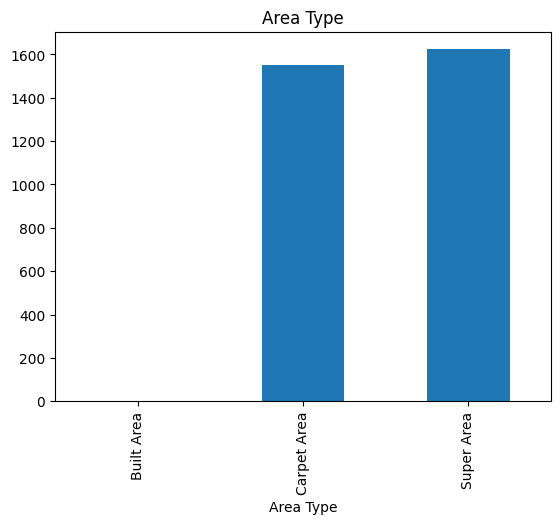

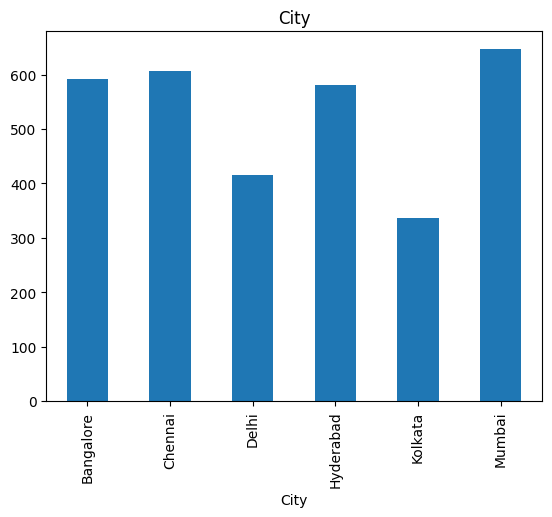

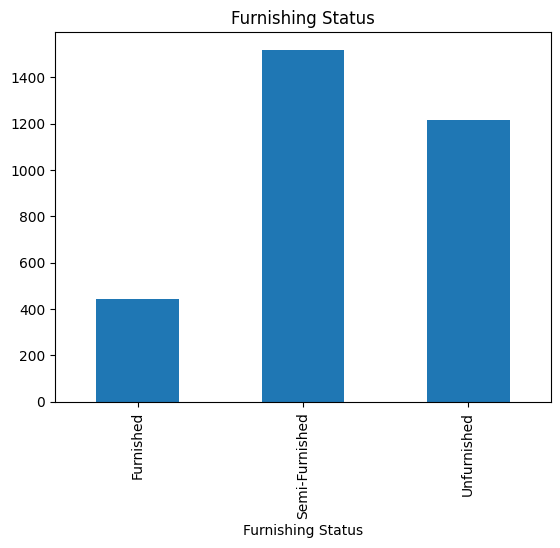

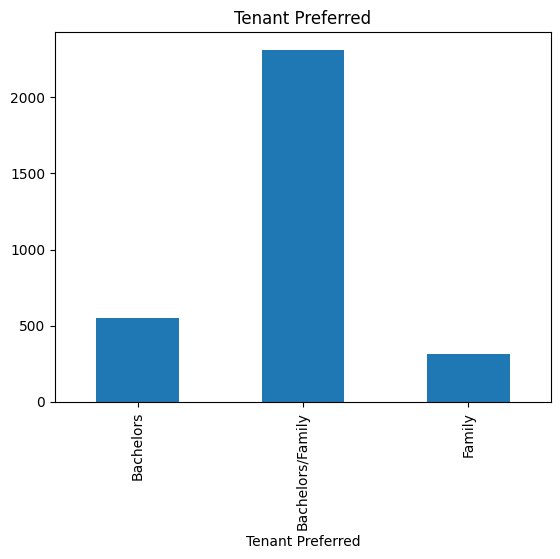

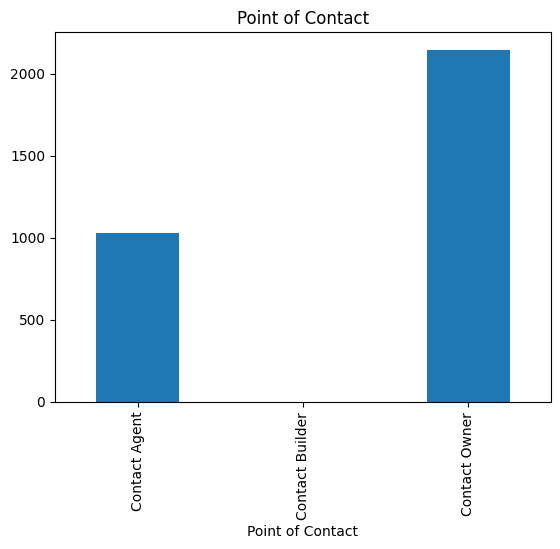

In [ ]:
import matplotlib.pyplot as plt

for col in cat_cols:
  # if col in ['Floor', 'Area Locality']:
  #   continue
  X_train.groupby(col).size().plot(kind='bar')
  plt.title(f'{col}')
  plt.show()

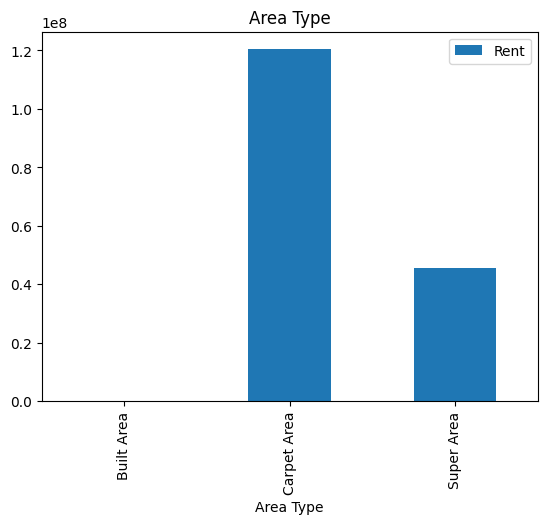

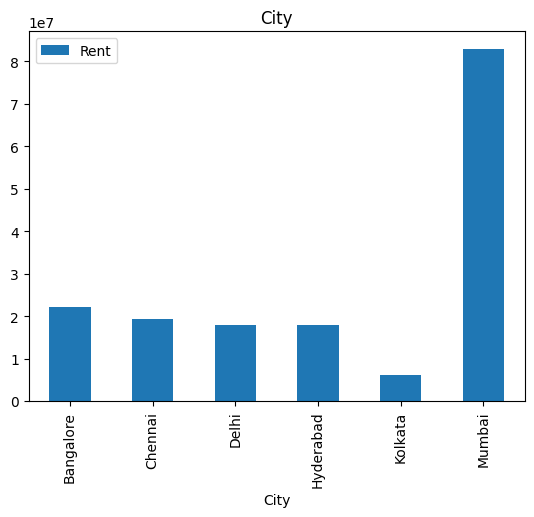

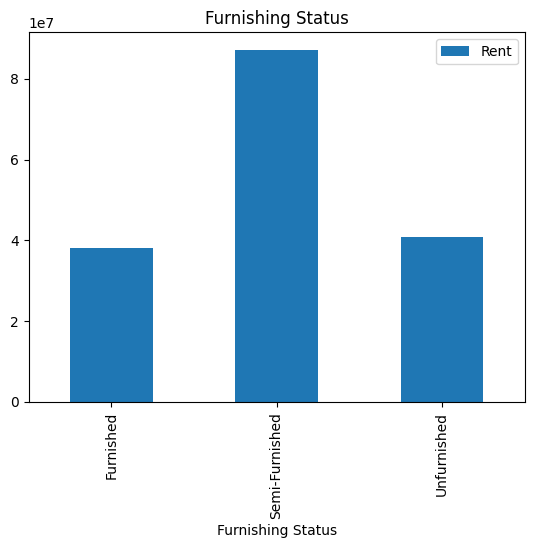

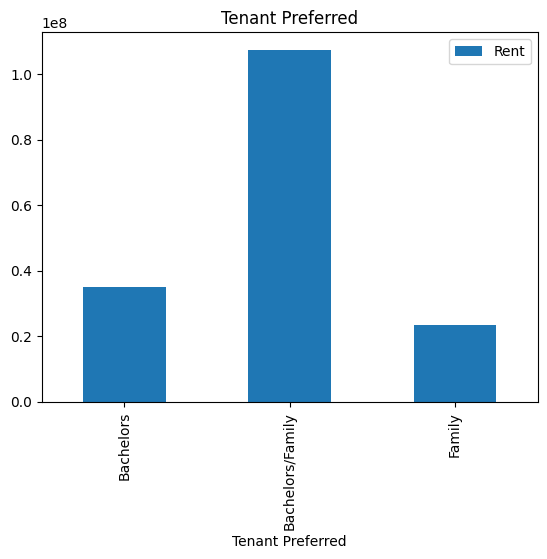

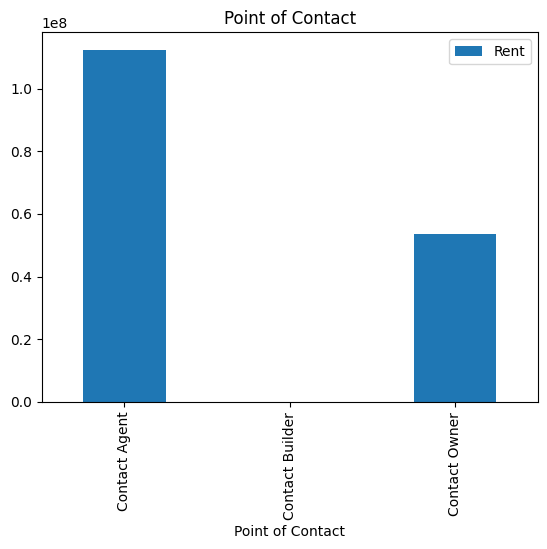

In [ ]:
import matplotlib.pyplot as plt

for col in cat_cols:
  # if col in ['Floor', 'Area Locality']:
  #   continue
  df.groupby(col).agg({'Rent':'sum'}).plot(kind='bar')
  plt.title(f'{col}')
  plt.show()

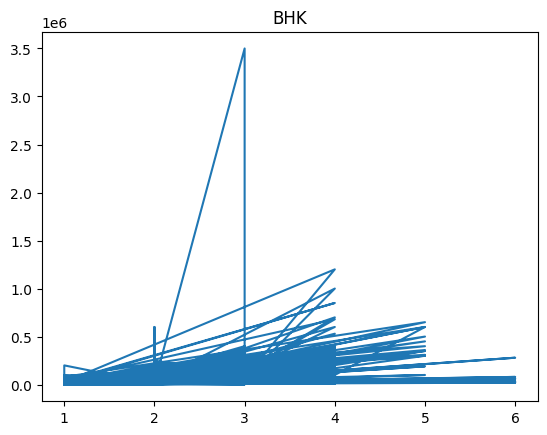

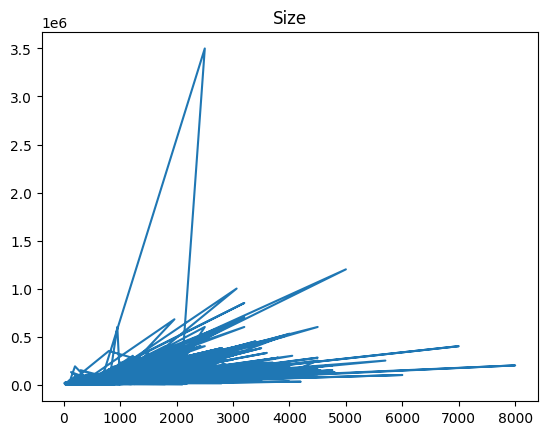

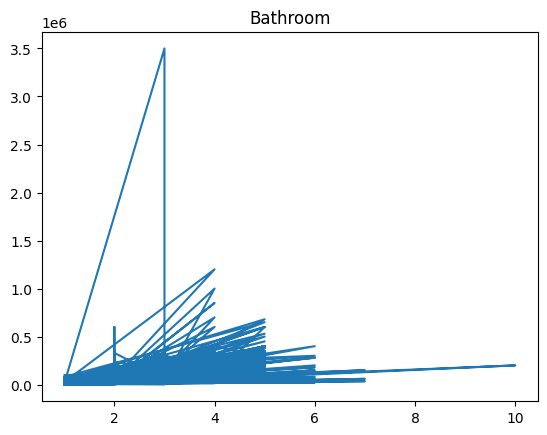

In [ ]:
for c in num_cols:
  plt.plot(df[c], df['Rent'])
  plt.title(f'{c}')
  plt.show()

### Outlier Analysis

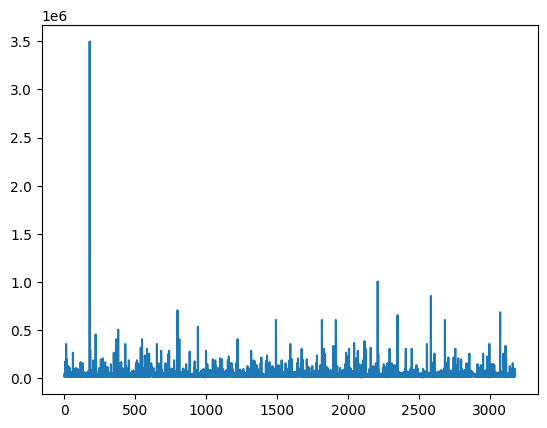

In [ ]:
plt.plot(np.arange(X_train.shape[0]), y_train)

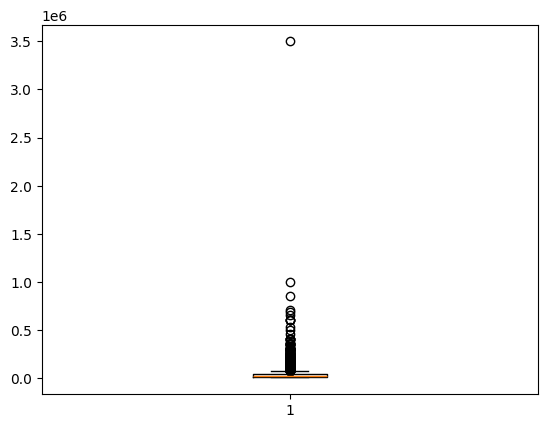

In [ ]:
plt.boxplot(y_train)
plt.show()

In [ ]:
y_train.describe()

,Rent
count,3.179000e+03
mean,3.571573e+04
std,8.644263e+04
min,1.200000e+03
25%,1.000000e+04
50%,1.600000e+04
75%,3.400000e+04
max,3.500000e+06


In [ ]:
np.quantile(y_train, 0.75)

np.float64(34000.0)

In [ ]:
y_train<=np.quantile(y_train, 0.75)

,Rent
4518,False
4103,True
2005,True
4040,True
3252,True
...,...
4426,True
466,True
3092,True
3772,False


In [ ]:
X_train[y_train<=np.quantile(y_train, 0.75)]

,Posted On,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4103,2022-06-06,2,900,3 out of 4,Carpet Area,Gwachiwali,Hyderabad,Semi-Furnished,Bachelors/Family,1,Contact Owner
2005,2022-07-04,2,800,1 out of 4,Super Area,whitefield,Bangalore,Unfurnished,Bachelors/Family,2,Contact Owner
4040,2022-05-06,2,60,3 out of 5,Super Area,"Gulmohar Park Colony, Serilingampally",Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
3252,2022-07-08,3,2064,11 out of 19,Super Area,Old Mahabalipuram Road,Chennai,Semi-Furnished,Family,4,Contact Owner
3263,2022-04-29,2,850,Ground out of 2,Super Area,Anakaputhur,Chennai,Unfurnished,Bachelors/Family,2,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...
3171,2022-05-12,2,800,1 out of 3,Super Area,Poonamalle,Chennai,Unfurnished,Bachelors/Family,1,Contact Owner
4426,2022-06-29,3,1500,1 out of 2,Carpet Area,"Ayodhya Nagar, Quthbullapur",Hyderabad,Semi-Furnished,Family,3,Contact Owner
466,2022-06-13,3,1200,3 out of 3,Super Area,Bansdroni,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
3092,2022-07-06,2,800,13 out of 17,Carpet Area,Vadapalani,Chennai,Semi-Furnished,Family,2,Contact Agent


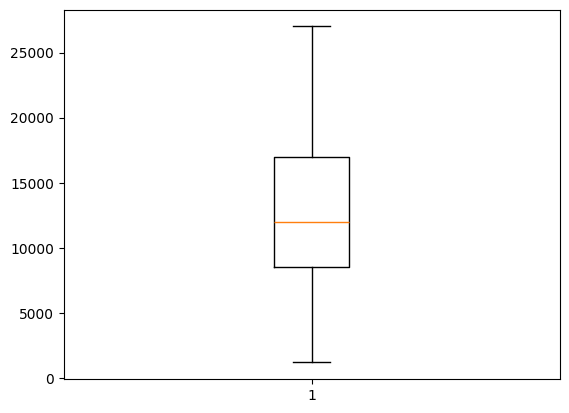

In [ ]:
plt.boxplot(y_train[y_train<=np.quantile(y_train, 0.70)])
plt.show()

In [ ]:
X_train = X_train[y_train<=np.quantile(y_train, 0.70)]
y_train = y_train[y_train<=np.quantile(y_train, 0.70)]
X_train.shape

(2226, 11)

In [ ]:
y_train.shape

(2226,)

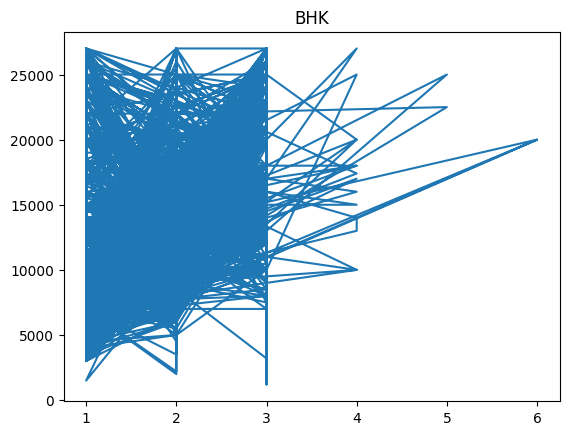

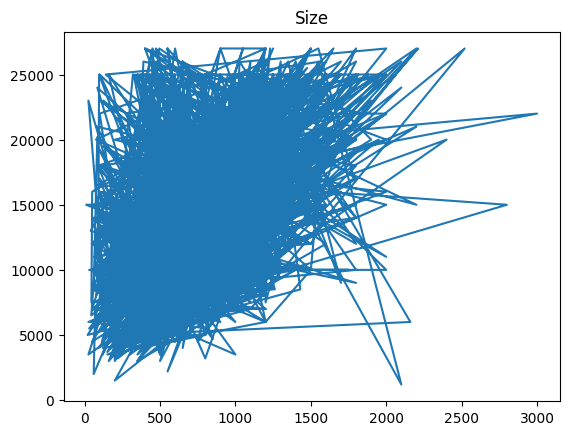

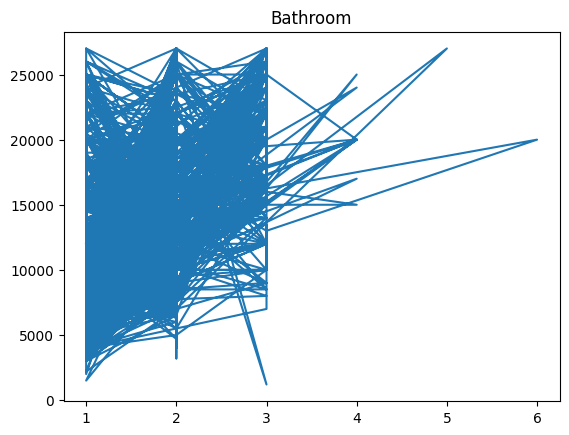

In [ ]:
for c in num_cols:
  plt.plot(X_train[c], y_train)
  plt.title(f'{c}')
  plt.show()

### Check assumptions of linear regression


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
X_train_cat = X_train[cat_cols].apply(le.fit_transform)
X_train_cat.head()

,Area Type,City,Furnishing Status,Tenant Preferred,Point of Contact
4103,1,3,1,1,2
2005,2,0,2,1,2
4040,2,3,2,1,2
3252,2,1,1,2,2
3263,2,1,2,1,2


In [ ]:
X_test_cat = X_test[cat_cols].apply(le.fit_transform)
X_test_cat.head()

,Area Type,City,Furnishing Status,Tenant Preferred,Point of Contact
1566,1,0,2,1,1
3159,1,1,0,1,1
538,0,5,1,1,1
2630,0,2,2,1,1
4418,0,3,2,2,0


In [ ]:
from feature_engine.encoding import CountFrequencyEncoder
X_train_high_card = X_train[high_card]

X_test_high_card = X_test[high_card]
encoder = CountFrequencyEncoder(
encoding_method='count',
variables=high_card,
)

encoder.fit(X_train_high_card)

CountFrequencyEncoder(variables=['Floor', 'Area Locality'])

In [ ]:
encoder.encoder_dict_

In [ ]:
X_train_high_card = encoder.transform(X_train_high_card)
X_train_high_card.head()

,Floor,Area Locality
4103,122,1
2005,114,5
4040,46,1
3252,2,8
3263,207,6


In [ ]:
X_test_high_card = encoder.transform(X_test_high_card).fillna(0)
X_test_high_card.head()

/usr/local/lib/python3.11/dist-packages/feature_engine/encoding/base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) Floor, Area Locality.
  warnings.warn(


,Floor,Area Locality
1566,154.0,0.0
3159,183.0,0.0
538,1.0,0.0
2630,77.0,0.0
4418,0.0,5.0


In [ ]:
X_train = pd.concat([X_train[num_cols], X_train_cat, X_train_high_card], axis = 1)
X_train.shape

(2226, 10)

In [ ]:
X_test = pd.concat([X_test[num_cols], X_test_cat, X_test_high_card], axis = 1)
X_test.shape

(1567, 10)

<Axes: >

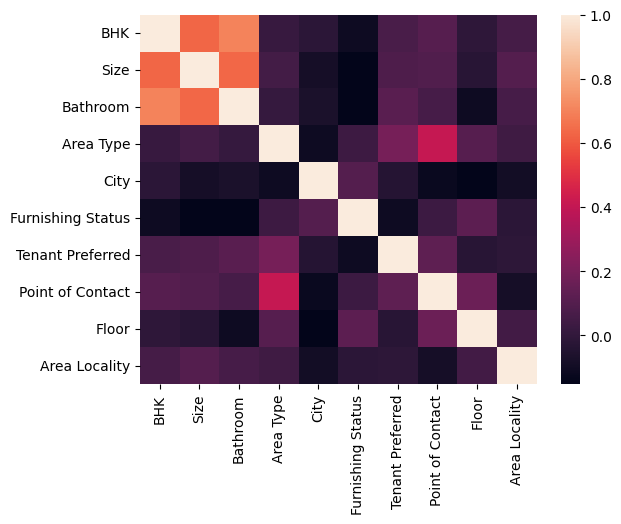

In [ ]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix on the numeric columns
corr = X_train.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

In [ ]:
corr

,BHK,Size,Bathroom,Area Type,City,Furnishing Status,Tenant Preferred,Point of Contact,Floor,Area Locality
BHK,1.000000,0.627040,0.701900,0.016038,-0.020439,-0.108283,0.069984,0.107616,-0.009445,0.057724
Size,0.627040,1.000000,0.633114,0.052319,-0.086630,-0.152346,0.085597,0.093379,-0.028903,0.101140
Bathroom,0.701900,0.633114,1.000000,0.011727,-0.066898,-0.150341,0.115351,0.061887,-0.109197,0.059461
Area Type,0.016038,0.052319,0.011727,1.000000,-0.111478,0.034248,0.198518,0.407595,0.107723,0.038789
City,-0.020439,-0.086630,-0.066898,-0.111478,1.000000,0.101641,-0.039164,-0.124046,-0.149096,-0.095056
Furnishing Status,-0.108283,-0.152346,-0.150341,0.034248,0.101641,1.000000,-0.110594,0.031976,0.124858,-0.017708
Tenant Preferred,0.069984,0.085597,0.115351,0.198518,-0.039164,-0.110594,1.000000,0.127719,-0.028741,-0.016796
Point of Contact,0.107616,0.093379,0.061887,0.407595,-0.124046,0.031976,0.127719,1.000000,0.163748,-0.087347
Floor,-0.009445,-0.028903,-0.109197,0.107723,-0.149096,0.124858,-0.028741,0.163748,1.000000,0.048177
Area Locality,0.057724,0.101140,0.059461,0.038789,-0.095056,-0.017708,-0.016796,-0.087347,0.048177,1.000000


### Observations
1. BHK & Bathroom are highly correlated
2. Size & BHK are highly correlated
3. Size and bathroom are highly correlated


In [ ]:
## let's drop BHK & size since they are highly correlated to other features
X_train= X_train.drop(['BHK', 'Size'], axis = 1)
X_test= X_test.drop(['BHK', 'Size'], axis = 1)

In [ ]:
## let's drop BHK & size since they are highly correlated to other features
X_train= X_train.drop(['Area Type'], axis = 1)
X_test= X_test.drop(['Area Type'], axis = 1)

In [ ]:
X_train.head()

,Bathroom,City,Furnishing Status,Tenant Preferred,Point of Contact,Floor,Area Locality
4103,1,3,1,1,2,122,1
2005,2,0,2,1,2,114,5
4040,2,3,2,1,2,46,1
3252,4,1,1,2,2,2,8
3263,2,1,2,1,2,207,6


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
vif_data

,feature,VIF
0,Bathroom,6.060079
1,City,2.474072
2,Furnishing Status,4.567634
3,Tenant Preferred,4.532114
4,Point of Contact,6.529982
5,Floor,3.858762
6,Area Locality,2.156947


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled.shape

(2226, 7)

In [ ]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled.shape

(1567, 7)

In [ ]:
X_train_scaled.shape, X_test_scaled.shape

((2226, 7), (1567, 7))

### sklearn Linear Regression uses Normal Equation

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_scaled, y_train)

In [ ]:
y_pred = reg.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error is: ', mean_squared_error(y_test, y_pred))

Mean Squared Error is:  3425046942.907456


In [ ]:
from sklearn.metrics import r2_score
# test R2
print('R2 Score is: ', r2_score(y_test, y_pred))

R2 Score is:  -0.0330542517773571


In [ ]:
# train R2
r2_score(y_train, reg.predict(X_train_scaled))

0.38663813139657044

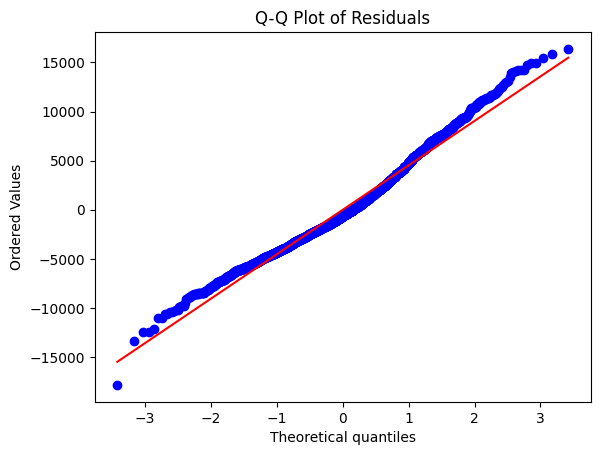

In [ ]:
# train residuals
residuals = y_train - reg.predict(X_train_scaled)
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


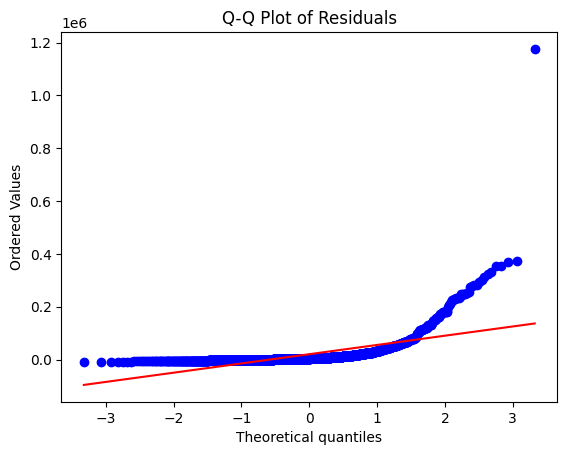

In [ ]:
# test residuals
residuals = y_test - y_pred
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


statsmodels

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     199.7
Date:                Sun, 04 May 2025   Prob (F-statistic):          4.37e-230
Time:                        20:47:41   Log-Likelihood:                -21915.
No. Observations:                2226   AIC:                         4.385e+04
Df Residuals:                    2218   BIC:                         4.389e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.38e+04    516.67

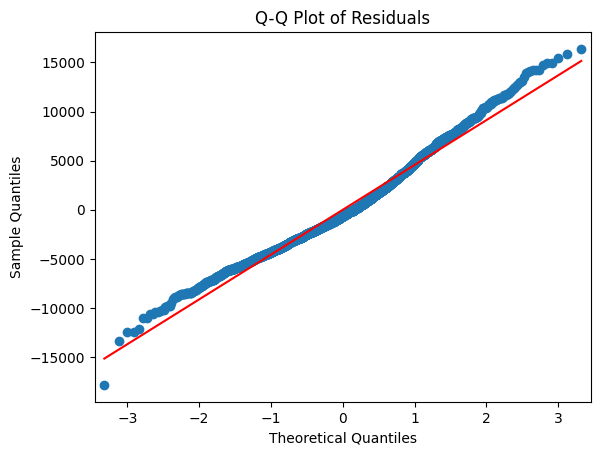

In [ ]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

# Q-Q Plot for residuals
sm.qqplot(model_sm.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [ ]:
# ### Next Steps

# try cross val
